In [105]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np


In [106]:
import torch

In [107]:
CATEGORICAL = ['country', 'store', 'product']

In [108]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [109]:
def create_time_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create features base on the date variable, the idea is to extract as much 
    information from the date componets.
    Args
        df: Input data to create the features.
    Returns
        df: A DataFrame with the new time base features.
    """
    
    df['date'] = pd.to_datetime(df['date']) # Convert the date to datetime.
    
    # Start the creating future process.
    df['year'] = df['date'].dt.year
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofmonth'] = df['date'].dt.days_in_month
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.weekofyear
    df['weekday'] = df['date'].dt.weekday
    df['is_weekend'] = np.where((df['weekday'] == 5) | (df['weekday'] == 6), 1, 0)
    
    return df

df = create_time_features(df)
df1 = create_time_features(df1)

<ipython-input-109-e364f5a1f379>:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear
<ipython-input-109-e364f5a1f379>:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [110]:
encoder = LabelEncoder()
for col in CATEGORICAL:
    df[col] = encoder.fit_transform(df[col])
    df1[col] = encoder.transform(df1[col])

In [111]:
df = df.set_index('row_id')
df1 = df1.set_index('row_id')

df = df.drop('date', axis=1)
df1 = df1.drop('date', axis=1)

In [112]:
df.describe()

,country,store,product,num_sold,year,quarter,month,day,dayofweek,dayofmonth,dayofyear,weekofyear,weekday,is_weekend
count,26298.000000,26298.00000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000
mean,1.000000,0.50000,1.000000,387.533577,2016.499658,2.508556,6.522930,15.729637,3.002053,30.459274,183.125257,26.661875,3.002053,0.286105
std,0.816512,0.50001,0.816512,266.076193,1.117749,1.117104,3.448769,8.800259,2.000550,0.795634,105.440647,15.064397,2.000550,0.451948
min,0.000000,0.00000,0.000000,70.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,28.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,190.000000,2016.000000,2.000000,4.000000,8.000000,1.000000,30.000000,92.000000,14.000000,1.000000,0.000000
50%,1.000000,0.50000,1.000000,315.000000,2016.000000,3.000000,7.000000,16.000000,3.000000,31.000000,183.000000,27.000000,3.000000,0.000000
75%,2.000000,1.00000,2.000000,510.000000,2017.000000,4.000000,10.000000,23.000000,5.000000,31.000000,274.000000,40.000000,5.000000,1.000000
max,2.000000,1.00000,2.000000,2884.000000,2018.000000,4.000000,12.000000,31.000000,6.000000,31.000000,366.000000,53.000000,6.000000,1.000000


In [113]:
# df = df.drop(columns=['product'])
# df1 = df1.drop(columns=['product'])

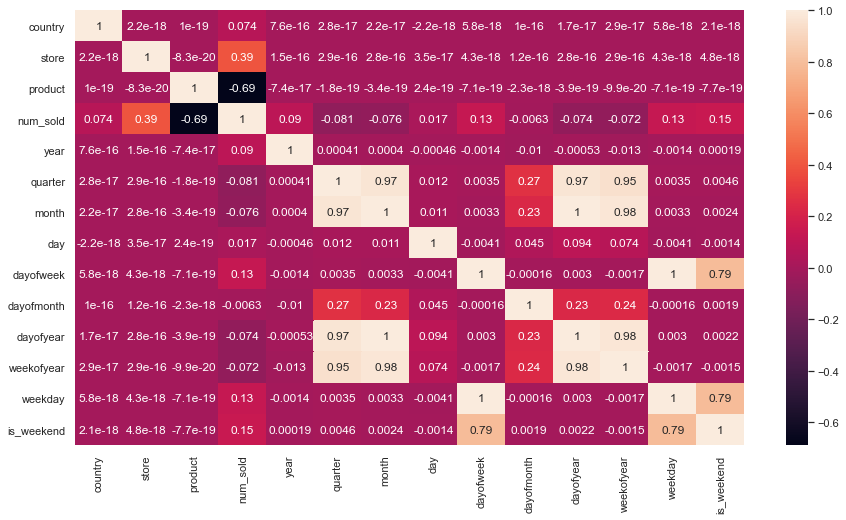

In [114]:
sn.set(rc = {'figure.figsize':(15,8)})
x = df.corr()
sn.heatmap(x, annot=True)
plt.show()

In [115]:
x = x.transpose()


In [59]:
from itertools import combinations
num_sold = df

df = df.drop(columns='num_sold')

cc = list(combinations(df.columns,2))
df = pd.concat([df[c[1]].sub(df[c[0]]) for c in cc], axis=1, keys=cc)
df.columns = df.columns.map(''.join)
for c in num_sold.columns:
    df[c] = num_sold[c]


In [60]:
num_sold = df1

cc = list(combinations(df1.columns,2))
df1 = pd.concat([df1[c[1]].sub(df1[c[0]]) for c in cc], axis=1, keys=cc)
df1.columns = df1.columns.map(''.join)
for c in num_sold.columns:
    df1[c] = num_sold[c]

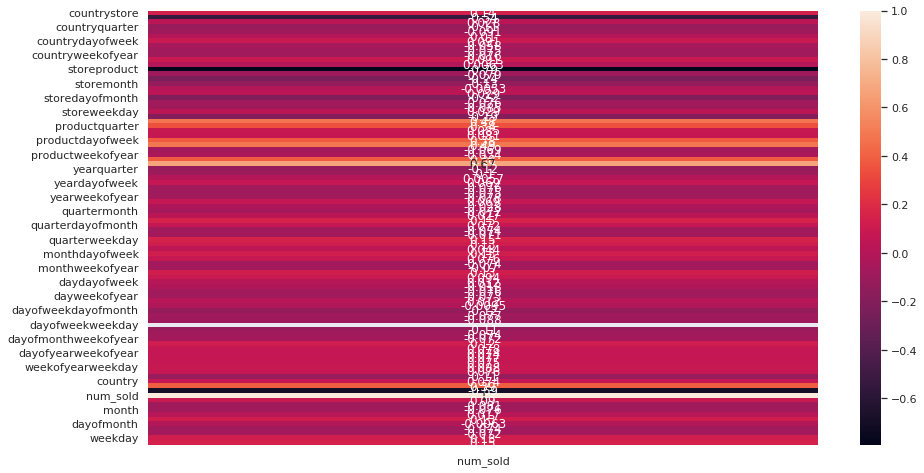

In [61]:
sn.set(rc = {'figure.figsize':(15,8)})
x = df.corr()[['num_sold']]
# x = x[x>0.1]
sn.heatmap(x, annot=True)
plt.show()

In [102]:
x = x.dropna()
x = x.transpose()

In [116]:
df[x.columns].to_csv('train2.csv')
df1[x.drop(columns=['num_sold']).columns].to_csv('test2.csv')

In [117]:
df['num_sold']

row_id
0         329
1         520
2         146
3         572
4         911
         ... 
26293     823
26294     250
26295    1004
26296    1441
26297     388
Name: num_sold, Length: 26298, dtype: int64